In [5]:
import csv
import ndjson
import os
root_path = os.getcwd().split('notebook')[0]
import sys
sys.path.insert(1, root_path)

In [11]:
from src.utils.model_utils import *
from src.utils.create_folders import *
from src.draw_model import *

In [2]:
config = ConfigParser()
config.read('config.cfg')

clip = float(config['DRAW']['clip'])
path = config['DRAW']['path']

In [3]:
print("Creating directories to save images, weights and the model ...")
create_folders()

Creating directories to save images, weights and the model ...


In [12]:
categories_file = os.path.join(root_path,'src/data/categories.csv')

In [4]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

### Select a category to download images from 

In [5]:

for key, value in categories.items():
    #print(key)
    pass

In [6]:
print("Select a category from the list above:")
category = input()

Select a category from the list above:
cat


In [7]:
# Setting data folder and path
dst_url = path
path = dst_url + '/'+ categories[category] + ".npy"
print(path)

data/input/cat.npy


In [8]:
src_list = []
dst_list = []

src_file = "gs://quickdraw_dataset/full/raw/" + categories[category] + ".ndjson"
src_list.append(src_file)
src_file = "gs://quickdraw_dataset/full/numpy_bitmap/" + categories[category] + ".npy"
src_list.append(src_file)

dst_file =  'data' + '\\' + 'input' + "\\" + categories[category]
dst_list.append(dst_file + ".ndjson")
dst_list.append(dst_file + ".npy")

for (src_file, dst_file) in zip(src_list, dst_list): 
    print(src_file, ",", dst_file)

gs://quickdraw_dataset/full/raw/cat.ndjson , data\input\cat.ndjson
gs://quickdraw_dataset/full/numpy_bitmap/cat.npy , data\input\cat.npy


In [ ]:
for (src_file, dst_file) in zip(src_list, dst_list): 
    !gsutil -m cp {src_file} {dst_file}

In [ ]:
filebase = dst_url + '/' + categories[category]
print('filebase:', filebase)

In [ ]:
npy_data = np.load(filebase + '.npy', allow_pickle=True)

In [ ]:
# load from file-like objects
with open(filebase + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [ ]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))

In [ ]:
def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

In [ ]:
print('There are ', len(npy_data)+1, ' images in selected category', categories[category])
print("Select an index value from 0 to", len(npy_data), "to display and compare bitmap and raw images:")
#index=input()
index='0'
plot_bitmap()
plt.show()
plot_raw()

In [9]:
# TRAIN TEST SPLIT
mypath = dst_url + '/'
x_train, x_test, y_train, y_test = split_data(mypath, shuffle=False)

In [10]:
# TRAINING AND TESTING

train_data = Dataset(x_train)
print('training data length:', int(len(train_data.data)/batch_size))

test_data = Dataset(x_test)
print('test data length:', int(len(test_data.data)/batch_size))

model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, path)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(beta1, 0.999))


if USE_CUDA:
    model.cuda()

def train():
    print("training...")
    model.start(epoch_num, phase='train') 

def test():    
    print("testing...")
    model.start(epoch_num, phase='test')
    
def generate_image(count):
    x = model.generate()
    save_image(x, count, T, A, B, model)

def generate():
    x = model.generate()
    count=0
    save_image(x,count,T,A,B,model)

training data length: 1000
test data length: 250


In [11]:
epoch_num = 1

training...
Epoch-0; Count-25; loss: 135.81933532714845;
Phase: test | Epoch: 0 | Start Time: 22:47:31
Epoch-0; Count-50; loss: 135.8196337890625;
Phase: test | Epoch: 0 | Start Time: 22:47:34
Epoch-0; Count-75; loss: 135.81855834960936;
Phase: test | Epoch: 0 | Start Time: 22:47:37
Epoch-0; Count-100; loss: 135.8196142578125;
Phase: test | Epoch: 0 | Start Time: 22:47:39
Epoch-0; Count-125; loss: 135.8146179199219;
Phase: test | Epoch: 0 | Start Time: 22:47:42
Epoch-0; Count-150; loss: 135.82071228027343;
Phase: test | Epoch: 0 | Start Time: 22:47:45
Epoch-0; Count-175; loss: 135.81750366210937;
Phase: test | Epoch: 0 | Start Time: 22:47:47
Epoch-0; Count-200; loss: 135.8214031982422;
Phase: test | Epoch: 0 | Start Time: 22:47:50
Epoch-0; Count-225; loss: 135.8191064453125;
Phase: test | Epoch: 0 | Start Time: 22:47:53
Epoch-0; Count-250; loss: 135.81853820800782;
Phase: test | Epoch: 0 | Start Time: 22:47:55
Epoch-0; Count-275; loss: 135.82187622070313;
Phase: test | Epoch: 0 | Start

C:\Users\ozgur\Desktop\sandbox\baxter-drawing\bankster\notebooks\utils\model_utils.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(img, cmap=plt.cm.gray)


image/count_385_test_1.png
image/count_385_test_0.png
image/count_385_test_1.png
image/count_385_test_2.png
image/count_385_test_3.png
image/count_385_test_4.png
image/count_385_test_5.png
image/count_385_test_6.png
image/count_385_test_7.png
image/count_385_test_8.png
image/count_385_test_9.png
image/count_385_test_2.png
image/count_385_test_0.png
image/count_385_test_1.png
image/count_385_test_2.png
image/count_385_test_3.png
image/count_385_test_4.png
image/count_385_test_5.png
image/count_385_test_6.png
image/count_385_test_7.png
image/count_385_test_8.png
image/count_385_test_9.png
image/count_385_test_3.png
image/count_385_test_0.png
image/count_385_test_1.png
image/count_385_test_2.png
image/count_385_test_3.png
image/count_385_test_4.png
image/count_385_test_5.png
image/count_385_test_6.png
image/count_385_test_7.png
image/count_385_test_8.png
image/count_385_test_9.png
image/count_385_test_4.png
image/count_385_test_0.png
image/count_385_test_1.png
image/count_385_test_2.png
i

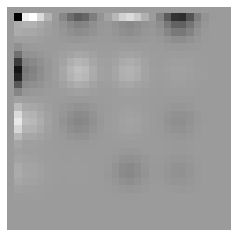

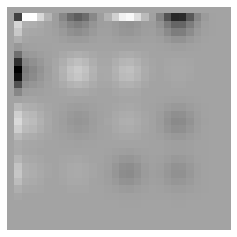

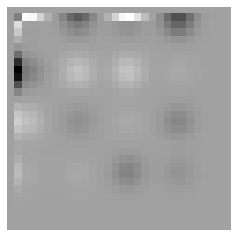

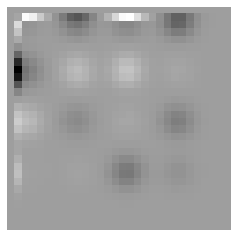

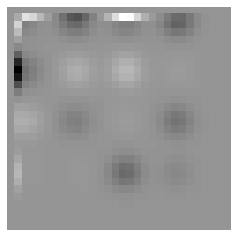

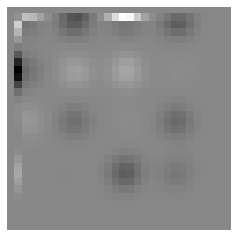

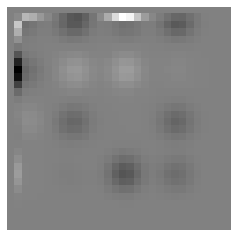

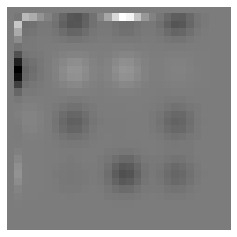

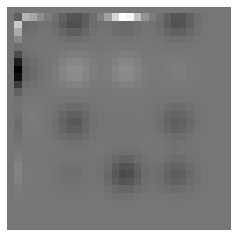

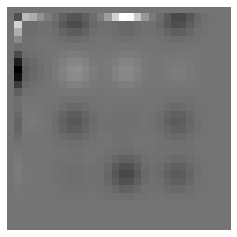

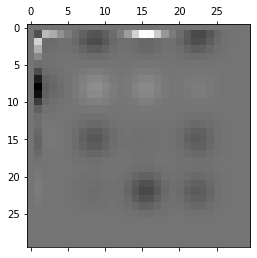

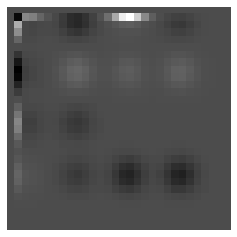

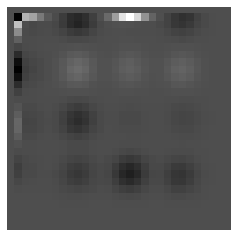

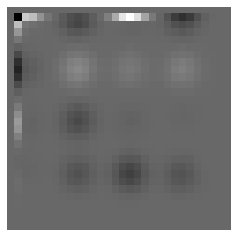

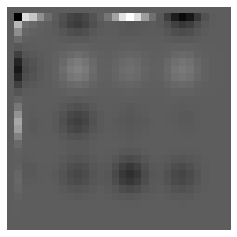

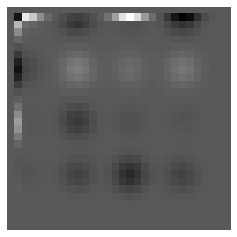

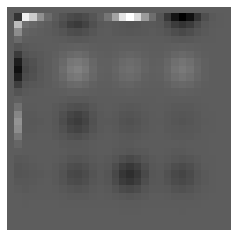

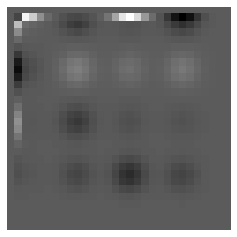

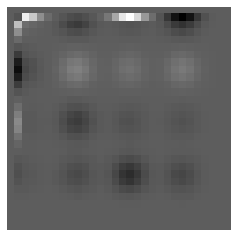

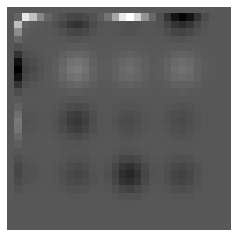

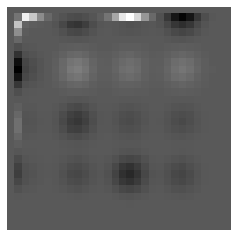

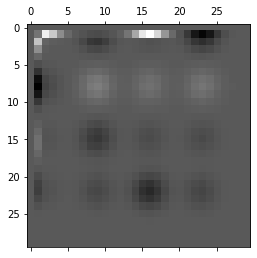

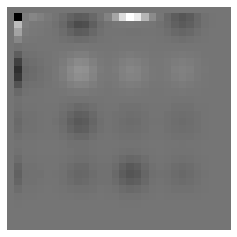

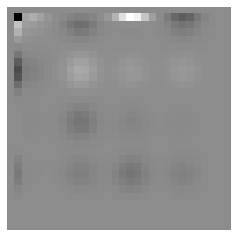

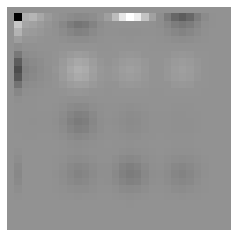

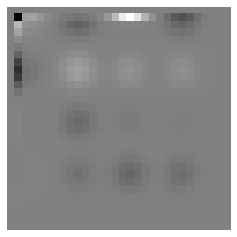

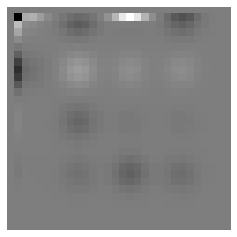

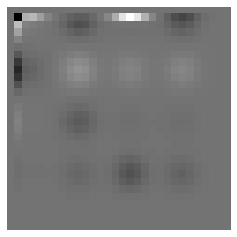

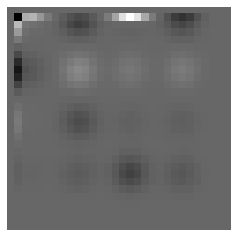

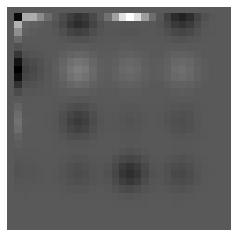

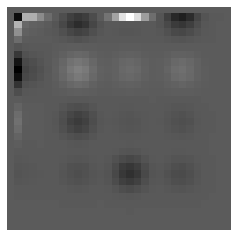

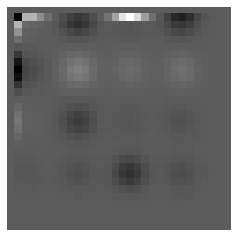

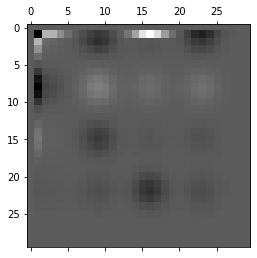

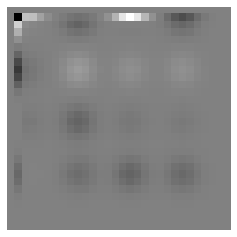

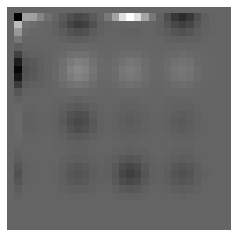

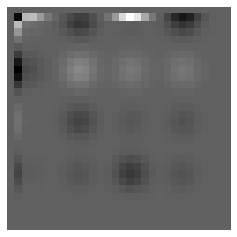

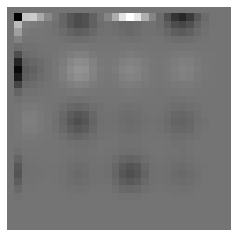

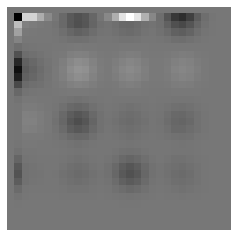

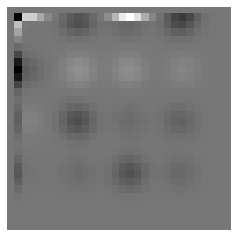

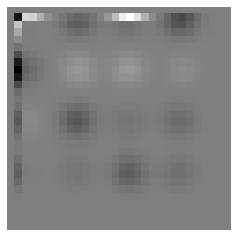

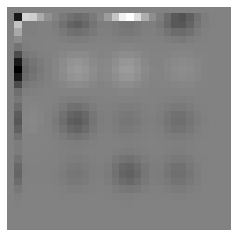

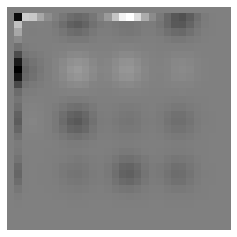

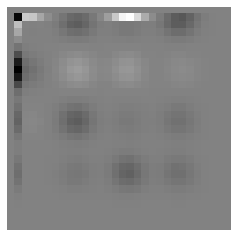

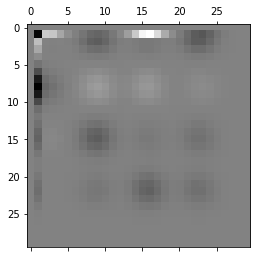

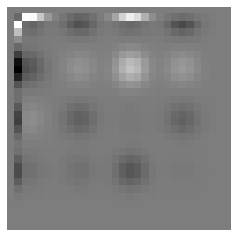

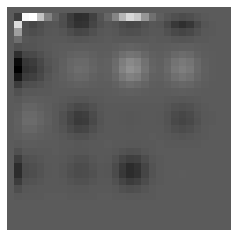

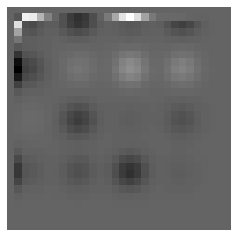

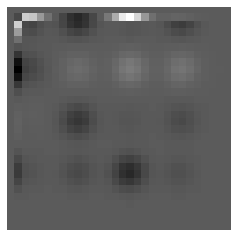

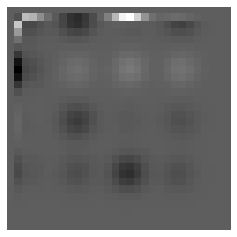

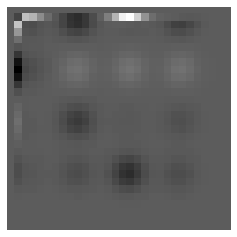

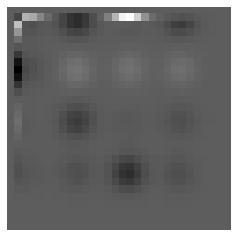

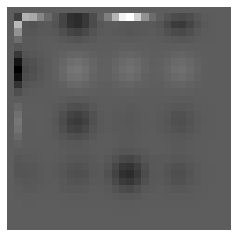

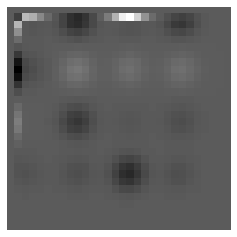

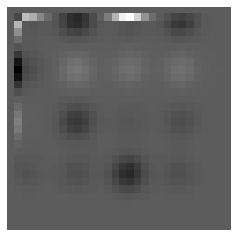

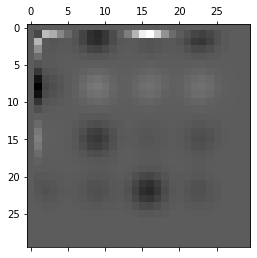

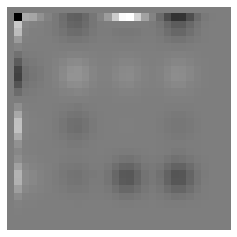

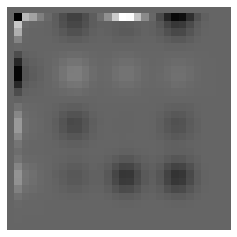

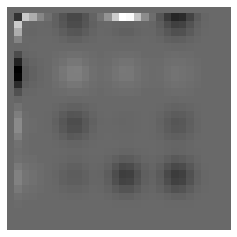

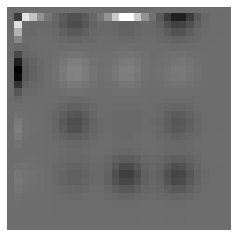

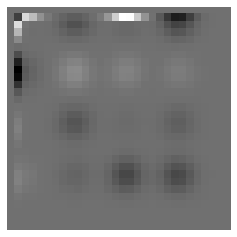

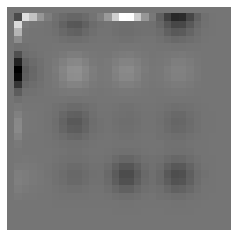

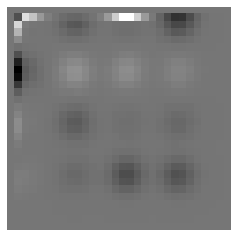

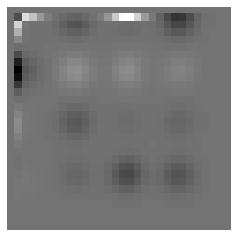

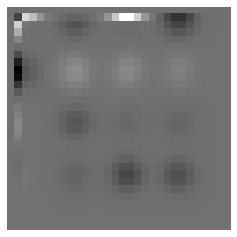

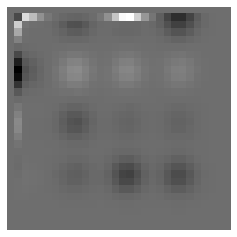

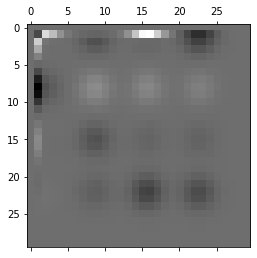

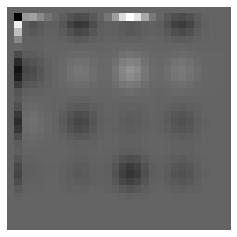

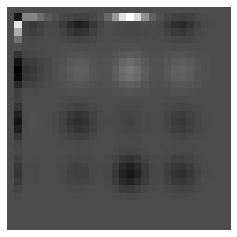

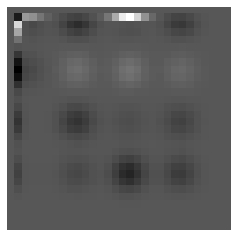

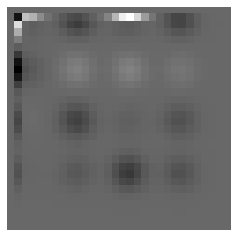

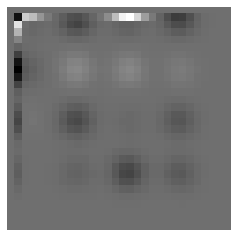

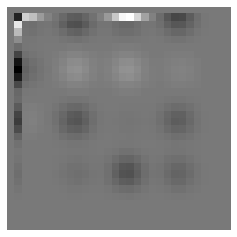

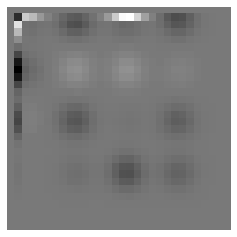

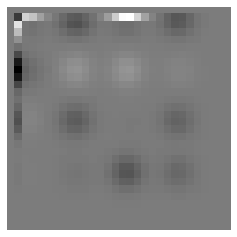

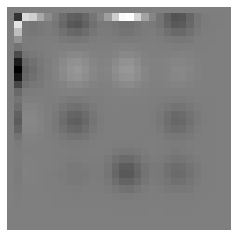

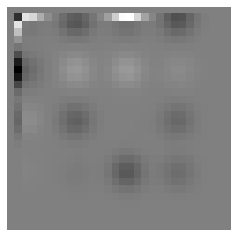

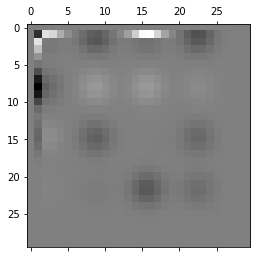

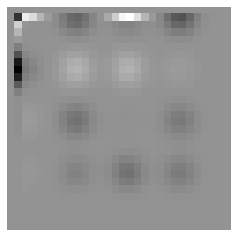

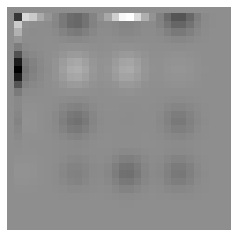

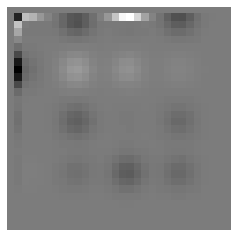

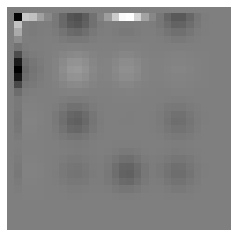

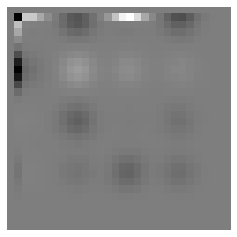

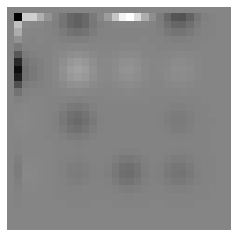

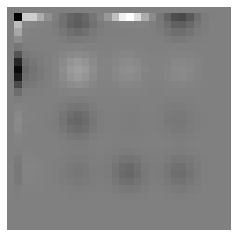

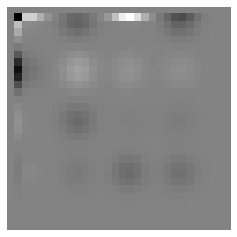

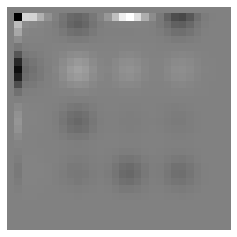

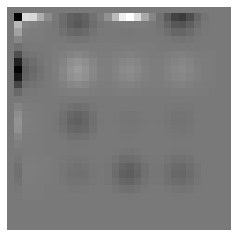

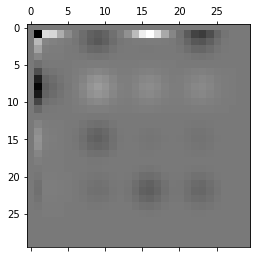

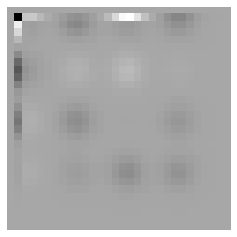

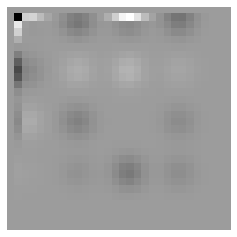

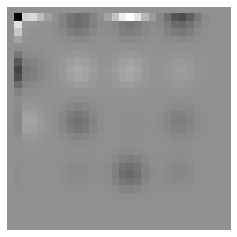

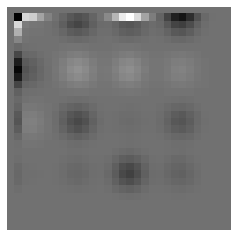

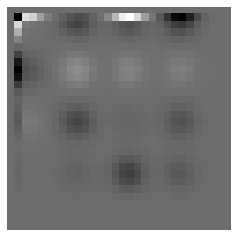

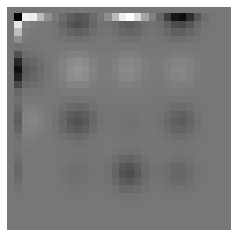

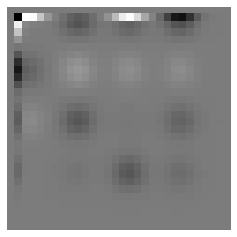

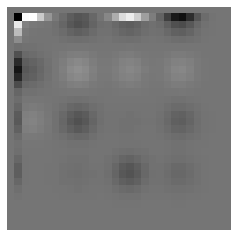

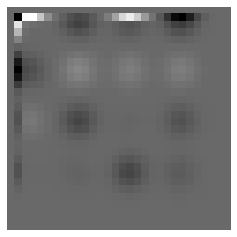

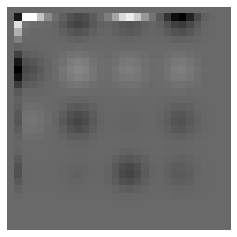

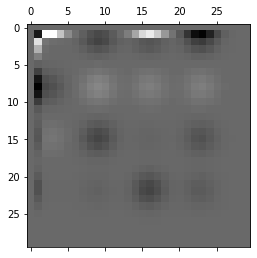

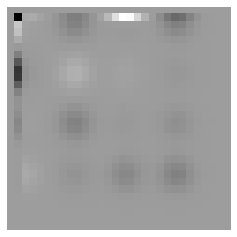

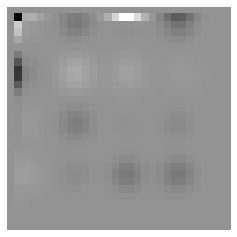

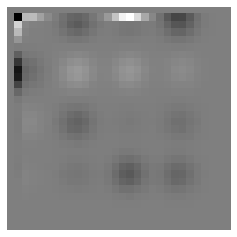

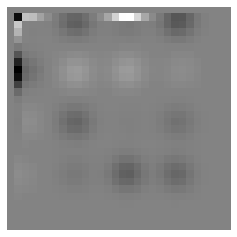

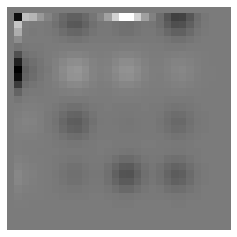

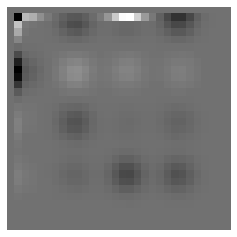

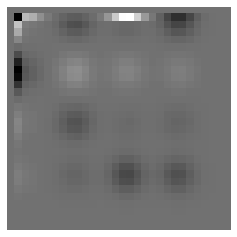

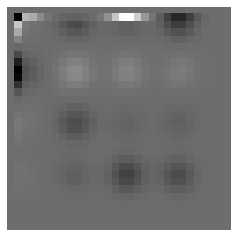

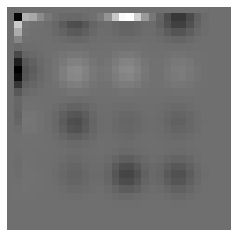

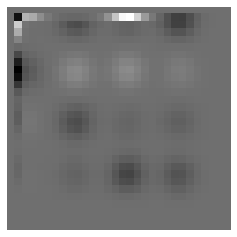

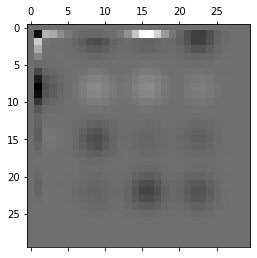

In [12]:
# TRAINING
train()

In [6]:
model_path = os.path.join(root_path, 'src/save/draw.pth')

In [ ]:
# SAVING MODEL
torch.save(model.state_dict(), model_path)

In [ ]:
# OPTION 1: LOADS MODEL WEIGHTS
torch.set_default_tensor_type('torch.FloatTensor')

model = DRAW(T,A,B,batch_size,z_size,N,dec_size,enc_size,path)

if USE_CUDA:
    model.cuda()

state_dict = torch.load('weights/weights_final.tar', map_location=torch.device('cpu'))

model.load_state_dict(state_dict)
model.eval()

In [ ]:
# OPTION2: LOADS MODEL
torch.set_default_tensor_type('torch.FloatTensor')
model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, path)
model.load_state_dict(torch.load('model/draw.pth'))
model.eval()

In [ ]:
generate()

## Testing

In [ ]:
# OPTION 1: LOADS MODEL WEIGHTS
torch.set_default_tensor_type('torch.FloatTensor')

model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, path)

if USE_CUDA:
    model.cuda()

state_dict = torch.load('weights/weights_final.tar', map_location=torch.device('cpu'))

model.load_state_dict(state_dict)
model.eval()

In [ ]:
# OPTION 2: LOADS MODEL
torch.set_default_tensor_type('torch.FloatTensor')
model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, path)
model.load_state_dict(torch.load('model/draw.pth'))
model.eval()

In [ ]:
test_data = Dataset(x_test)
print('len', int(len(test_data.data)/batch_size))

In [ ]:
test()

In [ ]:
generate()

## Idx Validation

In [ ]:
# Loading model
torch.set_default_tensor_type('torch.FloatTensor')
model = DRAW(T, A, B, z_size, N, dec_size, enc_size)
model.load_state_dict(torch.load('model/draw.pth', map_location=torch.device('cpu')))
model.eval()

In [ ]:
batch_size = 1

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
print('There are ', len(npy_data), ' images in selected database')
print("Enter image index from 0 to", len(npy_data)-1, "to display and compare bitmap and raw images:")
index=int(input())

In [ ]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))
    plt.show()

def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    plt.show()
    print('There are', i, 'number of strokes in this raw image file!')
    print('Image key id:', ndjson_data[int(index)]['key_id'])

In [ ]:
plot_bitmap()

In [ ]:
plot_raw()

In [ ]:
def validate():    
    print("validating...")

    avg_loss = 0
    count = 0

    data = npy_data[index:index+1]
    data = np.reshape(data, (data.shape[0], 1, A, B))
    data = torch.Tensor(data)
    bs = data.size()[0]
    data = Variable(data).view(bs, -1)
    loss = model.loss(data)
    avg_loss += loss.cpu().data.numpy()
    generate_image(count)
    
def generate_image(count):
    x = model.generate(batch_size)
    save_image(x,count)

def generate():
    x = model.generate(batch_size)
    save_image(x)

In [ ]:
validate()